In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [10]:
df= pd.read_csv('train.csv')

In [13]:
df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
user_name             63264 non-null object
country               82622 non-null object
review_title          82657 non-null object
review_description    82657 non-null object
designation           59010 non-null object
points                82657 non-null int64
price                 77088 non-null float64
province              82622 non-null object
region_1              69903 non-null object
region_2              35949 non-null object
winery                82657 non-null object
variety               82657 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB


In [162]:
df.describe()

,points,price,rating
count,82622.000000,82622.000000,82536.000000
mean,88.544698,36.926766,3.163189
std,3.099868,42.208450,0.925524
min,80.000000,4.000000,1.000000
25%,86.000000,18.000000,2.000000
50%,88.000000,29.000000,3.000000
75%,91.000000,43.000000,4.000000
max,100.000000,3300.000000,5.000000


# data preprocessing


In [27]:
#continuous data are points and price
df['points'].isnull().any()

False

In [28]:
df['price'].isnull().any()

True

In [29]:
#As we can see that price column has missing values.
#we generally replace any continuous data with mean value
df['price'].fillna((df['price'].mean()),inplace = True)

In [30]:
df['price'].isnull().any()

False

In [42]:
#From our background and domain knowledge we can see that name column doesnt have significant effect
#so we drop that column
df.drop(labels = 'user_name',
       axis=1, inplace = True)

In [33]:
df['country'].isnull().any()

True

In [34]:
df['province'].isnull().any()

True

In [37]:
#As we know we need country label to fill in the missing values for province and regions,
#we needto find a solution to clean country first
df['country'].isnull().sum()

35

In [38]:
df['country'].count()

82622

In [39]:
#From the above we can see that there are very few number of rows withcountries missing
#so let's take only those rows which are not null

df = df[df['country'].notnull()]


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82622 entries, 0 to 82656
Data columns (total 11 columns):
country               82622 non-null object
review_title          82622 non-null object
review_description    82622 non-null object
designation           58980 non-null object
points                82622 non-null int64
price                 82622 non-null float64
province              82622 non-null object
region_1              69903 non-null object
region_2              35949 non-null object
winery                82622 non-null object
variety               82622 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 7.6+ MB


# data visualization

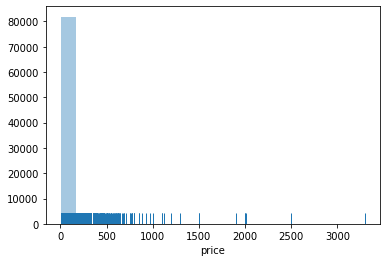

In [51]:
#univariate distributions
sns.distplot(df['price'], kde=False, rug=True,bins = 20);


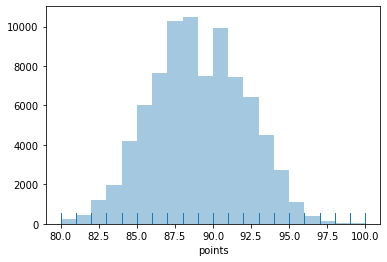

In [55]:
sns.distplot(df['points'], kde=False, rug=True,bins = 20);


In [73]:
df['points'].describe()

count    82622.000000
mean        88.544698
std          3.099868
min         80.000000
25%         86.000000
50%         88.000000
75%         91.000000
max        100.000000
Name: points, dtype: float64

In [75]:
rating_col = np.empty(82622)

In [163]:
def points_to_class(points):
    if points in range(79,83):
        return 1
    elif points in range(83,87):
        return 2
    elif points in range(87,90):
        return 3
    elif points in range(90,94):
        return 4
    elif points in range(94,101):
        return 5
    
df["rating"] = df["points"].apply(points_to_class)

In [164]:
df.head()

,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety,rating
0,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay,2
1,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend,3
2,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo,5
3,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend,3
4,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec,3


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

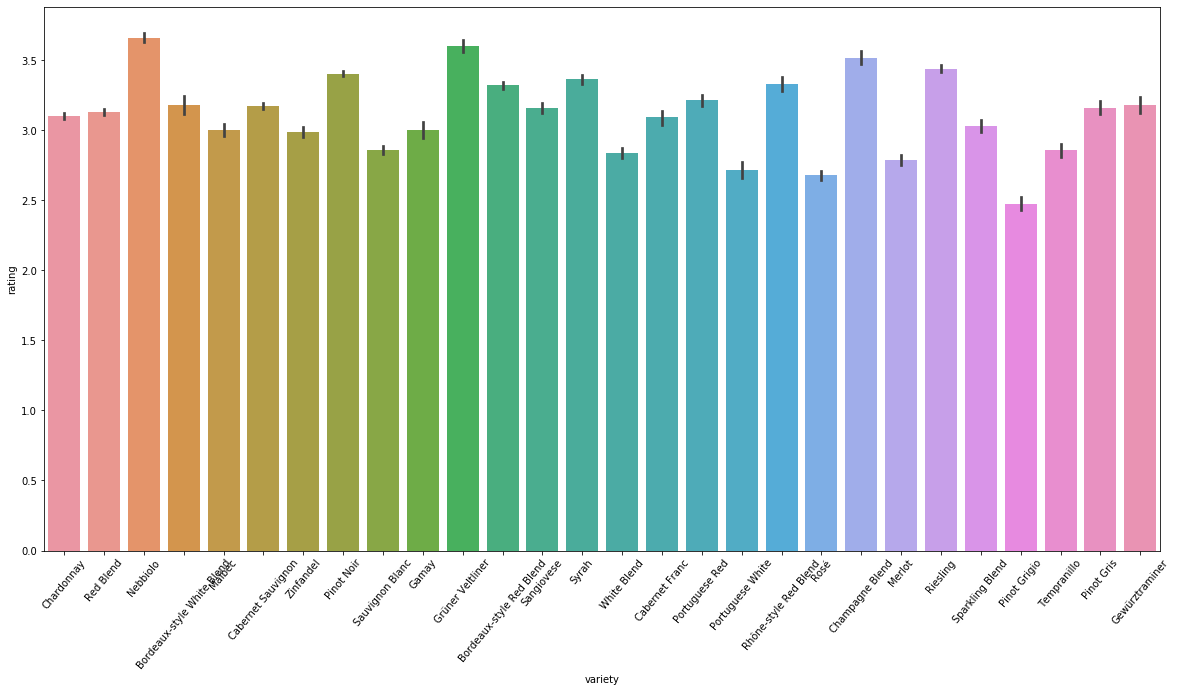

In [165]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.barplot(x='variety', y='rating', data=df)
plt.xticks(rotation=50)

We can see that the top 5 wine varieties (highly rated are)
#1 Nebbiolo
#2 Gruner veltiliner
#3 champagne Blend
#4 riestling
#5 pinot Noir

In [113]:
wines = ['Nebbiolo','Grüner Veltliner','Champagne Blend','Riesling','Pinot Noir']

top_wines = df[df.variety.isin(wines)]
top_wines

,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety,rating
2,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.000000,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo,5.0
8,US,Elizabeth Chambers 2014 Falcon Glen Vineyard P...,"Displaying typical McMinnville AVA subtlety, t...",Falcon Glen Vineyard,91,48.000000,Oregon,McMinnville,Willamette Valley,Elizabeth Chambers,Pinot Noir,4.0
13,Austria,H. & M. Hofer 2016 Grüner Veltliner (Weinland ...,"A creamy, rounded note hits the nose first, fo...",NaN,88,15.000000,Weinland Österreich,NaN,NaN,H. & M. Hofer,Grüner Veltliner,3.0
18,Italy,Palladino 2013 Parafada (Barolo),"Aromas suggesting underbrush, aromatic herb, v...",Parafada,93,68.000000,Piedmont,Barolo,NaN,Palladino,Nebbiolo,4.0
21,Italy,Ceretto 2011 Barolo,"Aromas of ripe, dark berry, mocha, toast and a...",NaN,89,55.000000,Piedmont,Barolo,NaN,Ceretto,Nebbiolo,3.0
22,US,Vision Cellars 2006 Las Alturas Vineyard Pinot...,"Too big by far for a Pinot Noir, this single-v...",Las Alturas Vineyard,84,48.000000,California,Santa Lucia Highlands,Central Coast,Vision Cellars,Pinot Noir,2.0
23,Italy,Eredi Lodali 2008 Lorens (Barbaresco),"Sophisticated and bright, this beautiful Barba...",Lorens,91,36.922232,Piedmont,Barbaresco,NaN,Eredi Lodali,Nebbiolo,4.0
35,France,Domaine Barmès-Buecher 2014 Réserve Pinot Noir...,The nose is very quiet but the body emanates a...,Réserve,89,30.000000,Alsace,Alsace,NaN,Domaine Barmès-Buecher,Pinot Noir,3.0
51,France,Thiénot 2007 Cuvée Alain Thiénot (Champagne),White flowers and almonds give fragrance to th...,Cuvée Alain Thiénot,94,100.000000,Champagne,Champagne,NaN,Thiénot,Champagne Blend,5.0
55,US,Amici 2014 Reserve Pinot Noir (Russian River V...,Spicy acidity wraps around a lengthy and inten...,Reserve,93,65.000000,California,Russian River Valley,Sonoma,Amici,Pinot Noir,4.0


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

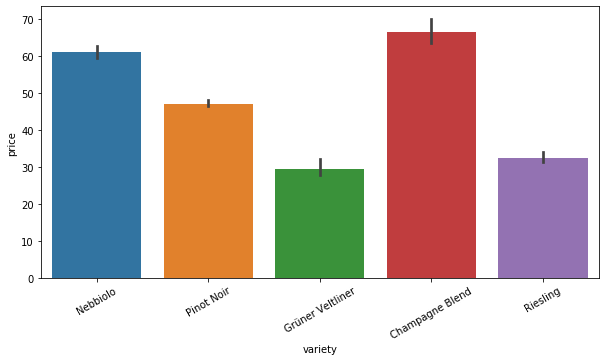

In [231]:
#now let us plot these varieties with their prices 
fig = plt.gcf()
fig.set_size_inches(10,5)
sns.barplot(x='variety', y='price', data=top_wines)
plt.xticks(rotation=30)

From the above figure we can see that the highly rated and the most expensive wine is Champagne Blend.

The highly rated yet the least expensive wine is Gruner Veltliner

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

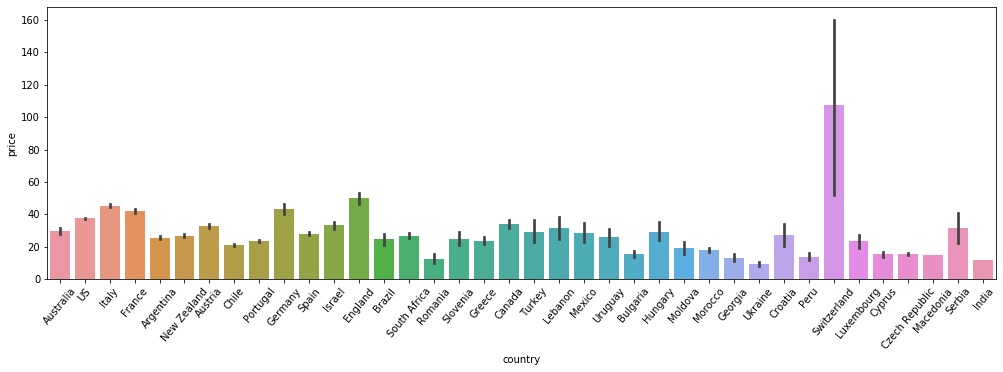

In [120]:
#now let us plot these varieties with their prices 
fig = plt.gcf()
fig.set_size_inches(17,5)
sns.barplot(x='country', y='price', data=df)
plt.xticks(rotation=50)

From the above figure,
We can see that the cost per wine is the highest in Switzerland and lowest in Ukraine


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

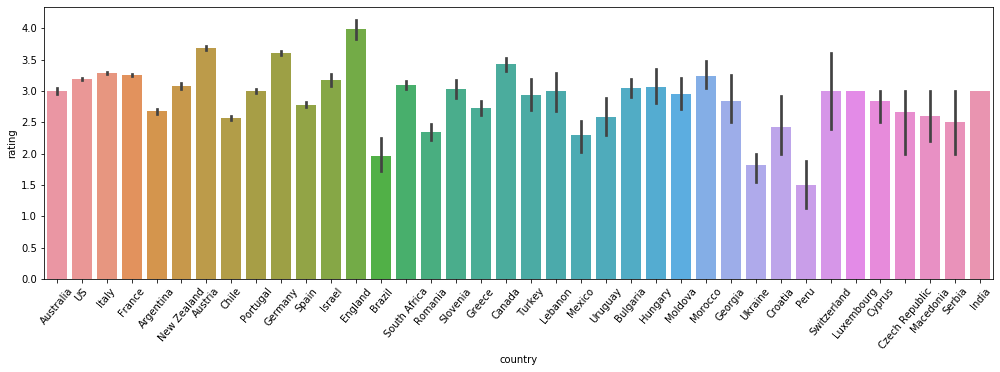

In [222]:
#now let us plot these varieties with their prices 
fig = plt.gcf()
fig.set_size_inches(17,5)
sns.barplot(x='country', y='rating', data=df)
plt.xticks(rotation=50)

 From the above figure, we can see that highest ratings are received from England and the lowest from peru.

In [234]:
s = df['winery'].value_counts()
df['winery'] = np.where(df['winery'].isin(s.index[s >= 90]), df['winery'], 'Other')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

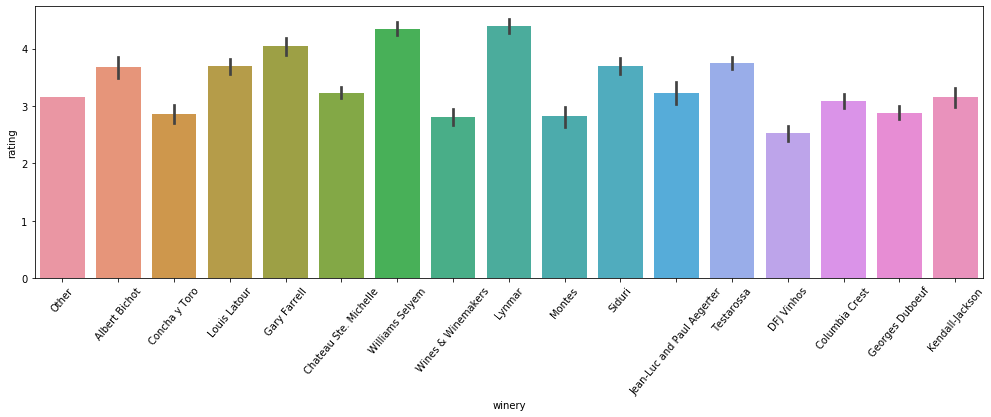

In [235]:
#now let us plot these varieties with their prices 
fig = plt.gcf()
fig.set_size_inches(17,5)
sns.barplot(x='winery', y='rating', data=df)
plt.xticks(rotation=50)

Lynmar and Williams Seylem wineries have highest ratings for their wines

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

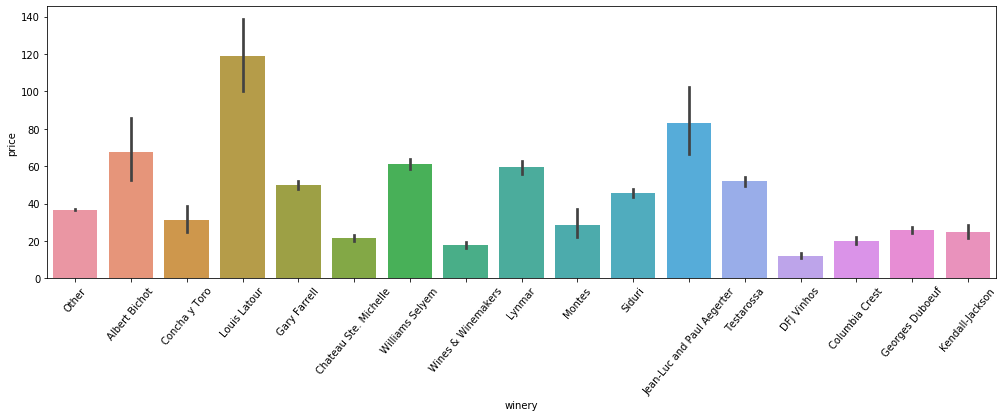

In [237]:
fig = plt.gcf()
fig.set_size_inches(17,5)
sns.barplot(x='winery', y='price', data=df)
plt.xticks(rotation=50)

The wines from Louis Latour winery are highly priced and DFJ Vinhos are least priced